# **DATA VISUALIZATION WITH PYTHON MATPLOTLIB FOR BEGINNER**

## **APA DAN KENAPA MATPLOTLIB?**
Salah satu library di python yang biasa digunakan untuk keperluan visualisasi data adalah matplotlib.

beberapa hal yang dapat dilakukan dengan matplotlib. Di antaranya:
- Pengolahan dataset (menggunakan library NumPy & Pandas).
- Membuat grafik dasar menggunakan matplotlib.
- Melakukan modifikasi komponen visualisasi, seperti axis, labels, title, dan legend.
- Menyimpan plot visualisasi yang sudah dibuat



## **PENGENALAN DATASET**
- Tujuan = untuk melihat performa bisnis penjualan
- Data =  'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv' 

In [1]:
import pandas as pd
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas:
   order_id  order_date  customer_id  ...    brand quantity item_price
0   1703458  2019-10-17        14004  ...  BRAND_J       10     740000
1   1706815  2019-10-24        17220  ...  BRAND_R        2     604000
2   1710718  2019-11-03        16518  ...  BRAND_C        8    1045000
3   1683592  2019-08-19        16364  ...  BRAND_A        4     205000
4   1702573  2019-10-16        15696  ...  BRAND_R        2    4475000

[5 rows x 9 columns]


## **PENJELASAN DATASET**
Berikut isi tampilan **data transaksi supermarket sepanjang tahun 2019**, lengkap dengan masing masing penjelsannya untuk tiap kolom
- **order_id** : ID dari order/transaksi, 1 transaksi bisa terdiri dari beberapa produk, tetapi hanya dilakukan oleh 1 customer
- **order_date** : tanggal terjadinya transaksi
- **customer_id** : ID dari pembeli, bisa jadi dalam satu hari, 1 customer melakukan transaksi beberapa kali
- **city** : kota tempat toko terjadinya transaksi
- **province** : provinsi (berdasarkan city)
- **product_id** : ID dari suatu product yang dibeli
- **brand** : brand/merk dari product. Suatu product yang sama pasti memiliki brand yang sama
- **quantity** : Kuantitas / banyaknya product yang dibeli
- **item_price** : Harga dari 1 product (dalam Rupiah). Suatu product yang sama, bisa jadi memiliki harga yang berbeda saat dibeli

**hal yang akan dilakukan:**
- Menampilkan grafik Gross Merchandise Value atau total uang yang dibayarkan curtomer



## **PENAMBAHAN KOLOM ORDER MONTH PADA DATASET**
- Untuk membuat grafik **GMV bulanan**, bayangan kita tentu adalah sebuah line chart dengan **sumbu-x** berupa **bulan**, dan **sumbu-y** adalah **total GMV** di bulan tersebut.

Ada beberapa function yang berperan di sini:
- **apply & lambda** biasa digunakan untuk membuat kolom baru, berdasarkan suatu kolom lain yang sudah ada (misal **.apply(lambda x: x*2)** berarti setiap input x di dalam kolom, akan diubah menjadi x*2). Dalam hal ini kolom yang sudah ada adalah dataset['order_date'], lalu tiap nilai di dalamnya kita proses agar menjadi month-nya saja
- Function **datetime.datetime.strptime** digunakan untuk mengubah date/time dalam bentuk string menjadi tipe data datetime.
- Function  **strftime** digunakan untuk mengubah format suatu data bertime datetime, dalam hal ini diubah menjadi '%Y-%m', yang berarti outputnya adalah waktu dengan bentuk YYYY-MM atau tahun dan bulan saja, tanggalnya sudah tidak ada. 



In [2]:
import datetime
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(dataset.head())

   order_id  order_date  customer_id  ... quantity item_price order_month
0   1703458  2019-10-17        14004  ...       10     740000     2019-10
1   1706815  2019-10-24        17220  ...        2     604000     2019-10
2   1710718  2019-11-03        16518  ...        8    1045000     2019-11
3   1683592  2019-08-19        16364  ...        4     205000     2019-08
4   1702573  2019-10-16        15696  ...        2    4475000     2019-10

[5 rows x 10 columns]


## **PENAMBAHAN KOLOM GMV PADA DATASET**
- Untuk membuat kolom **GMV** perkalikan setiap entri dikolom **item_price** dan kolom **quantity**. Bisa saja menggunakan fungsi apply & lambda seperti tadi, tetapi ada cara yang lebih mudah yaitu dengan mengalikan kedua kolom

In [3]:
dataset['gmv'] = dataset['item_price']*dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())


Ukuran dataset: 5000 baris dan 11 kolom

Lima data teratas:
   order_id  order_date  customer_id  ... item_price order_month      gmv
0   1703458  2019-10-17        14004  ...     740000     2019-10  7400000
1   1706815  2019-10-24        17220  ...     604000     2019-10  1208000
2   1710718  2019-11-03        16518  ...    1045000     2019-11  8360000
3   1683592  2019-08-19        16364  ...     205000     2019-08   820000
4   1702573  2019-10-16        15696  ...    4475000     2019-10  8950000

[5 rows x 11 columns]


## **MEMBUAT DATA AGREGAT**


In [4]:
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


## **PLOT PERTAMA: MEMBUAT LINE CHART TREND PERTUMBUHAN GMV**
- Menggunakan matplotlib untuk membuat line chart
- Cara standar untuk menggunakan matplotlib yaitu dengan memanggil function **plt.plot** lalu definisikan nilai di **sumbu-x** dan **sumbu-y**. Dalam hal ini, definisikan kolom **order_month** di **sumbu-x** (parameter pertama), dan kolom **gmv** di **sumbu-y** (parameter kedua). Setelah selesai mendefinisikan komponen chart-nya, lalu panggil **plt.show()**untuk menampilkan grafiknya.


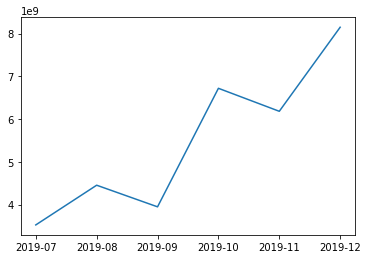

In [5]:
import matplotlib.pyplot as plt
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

## **CARA ALTERNATIF: FUNGSI .plot() PADA PANDAS DATAFRAME**
- Dengan pendekatan lain, dimungkinkan juga melakukan visualisasi dengan matplotlib tanpa membuat variabel baru 

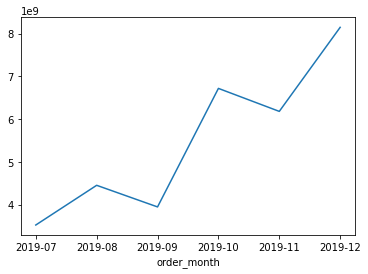

In [6]:
import matplotlib.pyplot as plt
dataset.groupby('order_month')['gmv'].sum().plot()
plt.show()

## **KESIMPULAN**
dua cara untuk membuat plot menggunakan matplotlib:
1.	Kita dapat menggunakan fungsi **plt.plot()** dari library matplotlib.pyplot as plt
2.	atau dengan menggunakan fungsi **.plot()** langsung dari variabel dataframe, yaitu dataset pada kasus kita sebelumnya. 


## **ANATOMI DARI FIGURE**

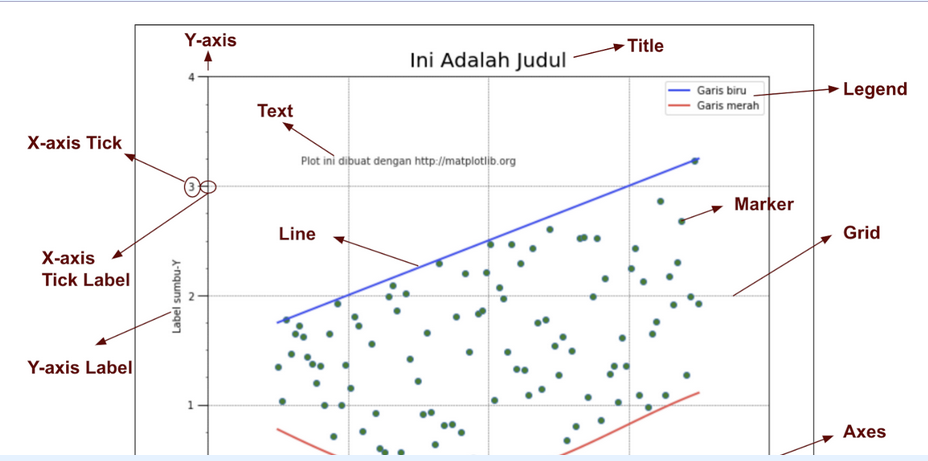


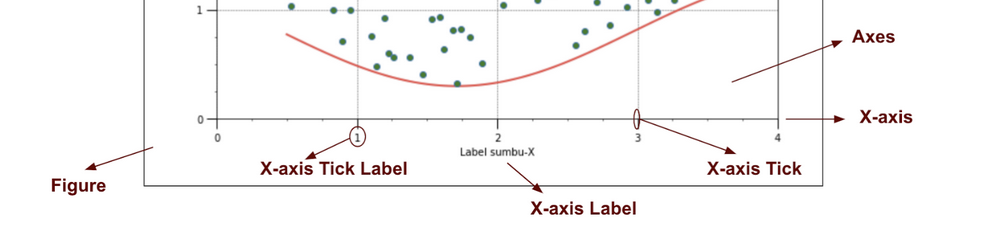

## **ANATOMI DARI FIGURE**
Ada beberapa istilah dan komponen di sebuah plot, nanti akan mempermudah mengingat function apa yang digunakan untuk memodifikasinya.
- **Figure** adalah keseluruhan visualisasi yang kita plot dalam 1 kali menjalankan code.
- Sedangkan satu plot (yang dibuat saat memanggil .plot() atau .scatter()) disebut **Axes**. Sebuah Figure bisa terdiri dari beberapa Axes. 
- Setiap Axes biasanya memiliki sumbu-X **(X-axis)** dan sumbu-Y **(Y-axis)**. Masing-masing sumbu memiliki komponen sebagai berikut:
  - **Axis Label**: Nama dari sumbu yang ditampilkan.
  - **Tick**: Penanda berupa titik/garis kecil yang berjajar di sumbu, sebagai referensi skala nilai.
  - **Tick Label**: Tulisan di tiap tick yang menyatakan nilainya.
- Untuk isi grafiknya sendiri, bisa berupa **line** (untuk line plot), atau **marker** (untuk scatter plot), bisa juga bentuk lain seperti **bar** (untuk bar plot / histogram).
- Aksesoris lain yang bisa ditambahkan, di antaranya **Grid** untuk mempermudah melihat tick yang sejajar, dan **Text** untuk memberikan informasi tambahan berbentuk teks di grafik.


Memahami komponen-komponen di atas sudah cukup untuk melakukan berbagai visualisasi dengan matplotlib. Untuk anatomi yang lebih lengkap, bisa dilihat di link berikut: https://matplotlib.org/3.1.3/gallery/showcase/anatomy.html.


## **MENGUBAH FIGURE SIZE**
- Langkah pertama ubah ukuran grafiknya. Kalau ukuran grafiknya yang diubah belakangan, banyak komponen lain yang berubah bentuknya
- 

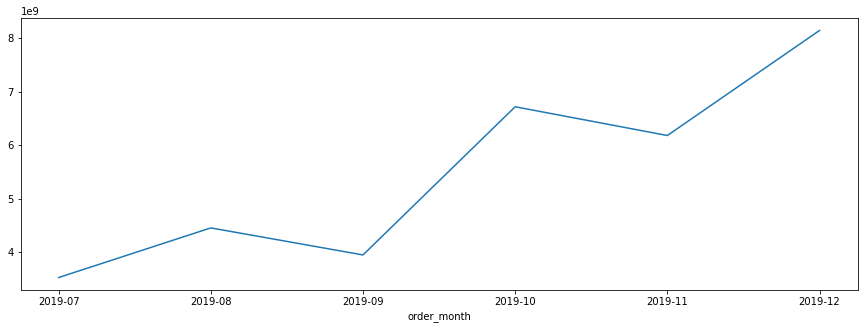

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()


dalam gambar diatas, ukuran Figure diubah agar memiliki panjang 15 inch, dan lebar 5 inch, sehingga line chart-nya bisa memanjang ke kanan dan lebih mudah dilihat trend-nya

## **MENAMBAHKAN TITLE DAN AXIS LABELS**
- Beberapa hal yang lazim dimodifikasi pada sebuah grafik adalah judul (title) dan label di sumbu-x & sumbu-y (axis labels). Untuk menambahkannya, tinggal menambah **plt.title, plt.xlabel, dan plt.ylabel** di code sebelum **plt.show()**


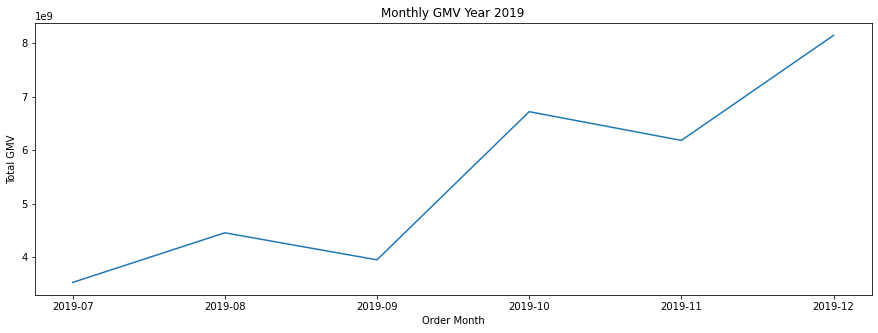

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
dataset.groupby('order_month')['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019')
plt.xlabel('Order Month')
plt.ylabel('Total GMV')
plt.show()

## **KUSTOMISASI TITLE AND AXIS LABELS**
Kita bisa melakukan berbagai modifikasi (kustomisasi) dengan menambahkan parameter ke dalam function-nya. 

Misalnya, untuk judul/title, parameter yang bisa ditambahkan:
- **loc**: digunakan untuk menentukan posisi title, misalnya **‘left’** untuk membuat rata kiri, **‘right’** untuk rata kanan, dan **‘center’** untuk meletakkannya di tengah. Jika tidak didefinisikan, maka defaultnya title ada di tengah.
- **pad**: digunakan untuk menambahkan jarak antara judul ke grafik (dalam satuan px), misalnya kita tidak ingin judulnya terlalu menempel dengan grafiknya, jadi kita beri jarak.
- **fontsize**: digunakan untuk mengganti ukuran font/huruf (dalam satuan px).
- **color**: digunakan untuk mengganti warna huruf judul. Kita bisa menggunakan warna dasar dengan kata seperti ‘blue’, ‘red’, ‘orange’, dsb. Bisa juga dengan **hex string**, misalnya '#42DDF5' untuk warna biru muda.

Untuk **xlabel dan ylabel**, kita bisa mengganti **fontsize dan color**, tetapi tidak bisa mengganti **loc**.


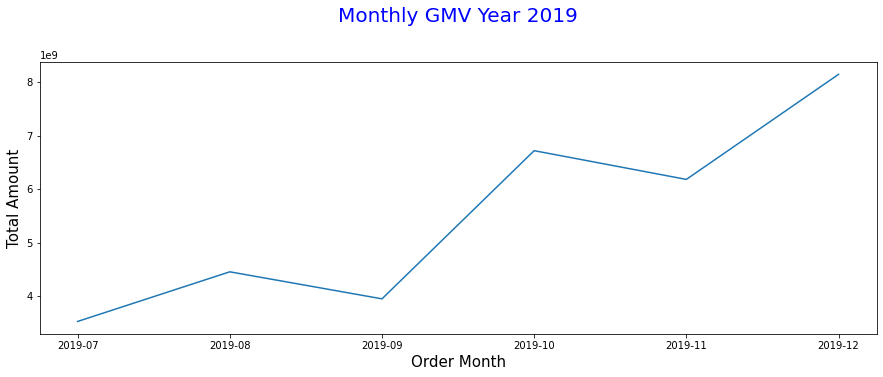

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, 	color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()


## **KUSTOMISASI LINE DAN POINT
Untuk mengubah style dari garis maupun titik di chart, cukup dengan menambahkan parameter di function **.plot()**. Beberapa parameter yang bisa dikustomisasi:
- **color**: mengubah warnanya (sama seperti di title)
- **linewidth**: mengubah ketebalan line/garisnya (dalam satuan px)
- **linestyle**: mengubah jenis dari garis. Misalnya '-' atau **'solid'** untuk garis tak terputus (seperti pada default), '--' atau **'dashed'** untuk garis putus-putus, ':' atau **'dotted'** untuk garis berupa titik-titik, bisa juga '-.' atau **‘dashdot’** untuk garis dan titik bergantian.
- **marker**: mengubah tipe points/titik data di chart. Ada banyak sekali kemungkinan nilai untuk marker ini, yang biasanya digunakan yaitu ‘.’ untuk bulatan kecil/titik, ‘o’ untuk bulatan agak besar, ‘s’ untuk persegi, ‘D’ untuk diamond/wajik, dan bentuk-bentuk lain seperti ‘+’, ‘x’, ‘|’, ‘*’.


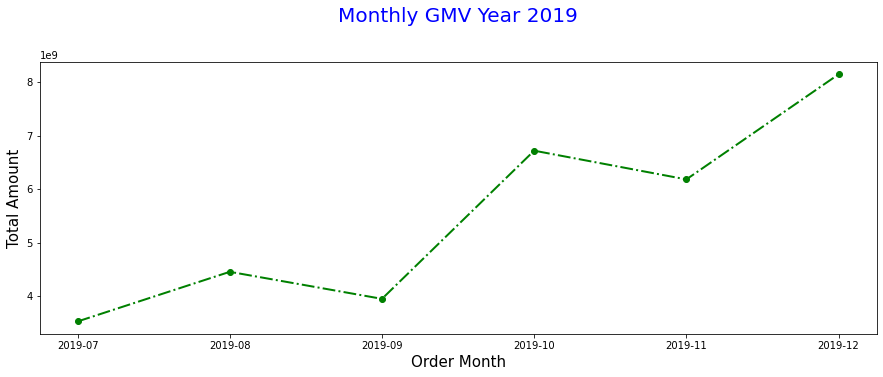

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', 	marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, 	color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()


## **KUSTOMISASI GRID**
- grid juga yang berguna agar nilai di masing-masing titik bisa mudah dipetakan ke sumbu-y.

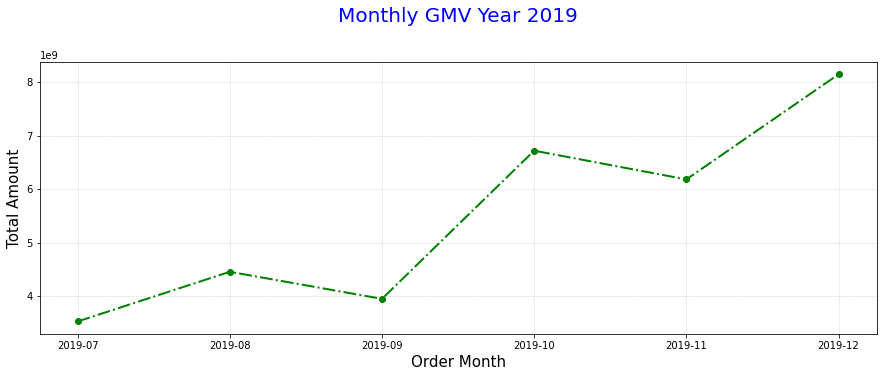

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', 	marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, 	color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show()


## **KUSTOMISASI AXIS TICKS**

- titik-titik di sumbu y, nilainya masih aneh. 2.0, 2.5, 3.0 dsb lalu di atasnya 1e11. Kayaknya bisa dibuat lebih jelas lagi. Buat saja dalam bentuk miliar agar lebih mudah dipahami
- Nilai-nilai di sumbu x dan y bisa diakses melalui function **plt.xticks() dan plt.yticks()**.


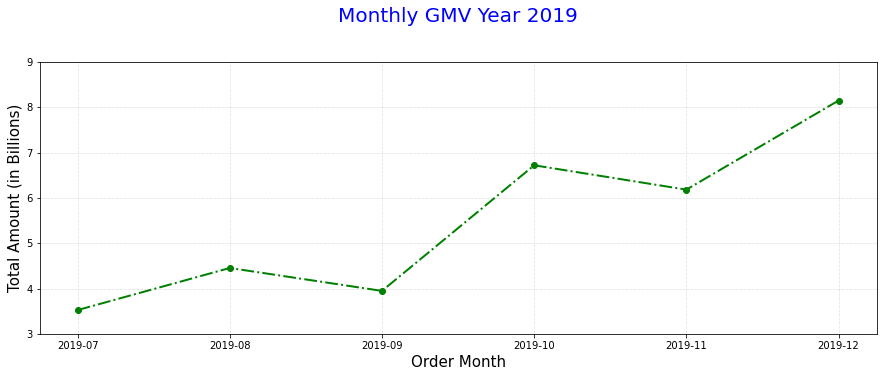

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', 	marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, 	color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()


## **MENENTUKAN BATAS MINIMUM DAN MAKSIMUM AXIS TICKS**

- Di sini dapat dilihat bahwa nilai terkecil di sumbu-y adalah 150. Ini kadang bisa membuat orang tertipu sih, seakan-akan GMV di bulan Oktober naik menjadi hampir 3 kali lipat dari September. Untuk itu sebaiknya diset agar sumbu-y nya dimulai dari 0, cukup tambahkan **plt.ylim(ymin=0)** 



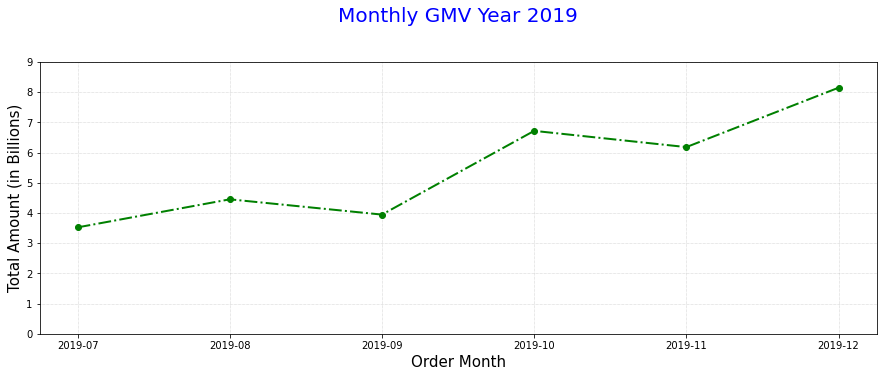

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()


Untuk mengatur batas maksium, kita tambahkan juga parameter ymax, tetapi sepertinya di sini tidak perlu. Kita juga bisa mengatur batas minimum dan maksimum sumbu-x dengan function plt.xlim.

## **MENAMBAHKAN INFORMASI PADA PLOT**

- Ada baiknya kita menambahkan beberapa informasi di dalamnya agar pembaca mendapatkan insight dari grafik tersebut
- Dilihat dari trend-nya, mulai bulan **Oktober 2019**, **GMV** kita **naik drastis** setelah sebelumnya stagnan di angka 200-300 milyar per bulan. Kita bisa mulai dengan menambahkan info ini di grafik. Caranya seperti ini

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


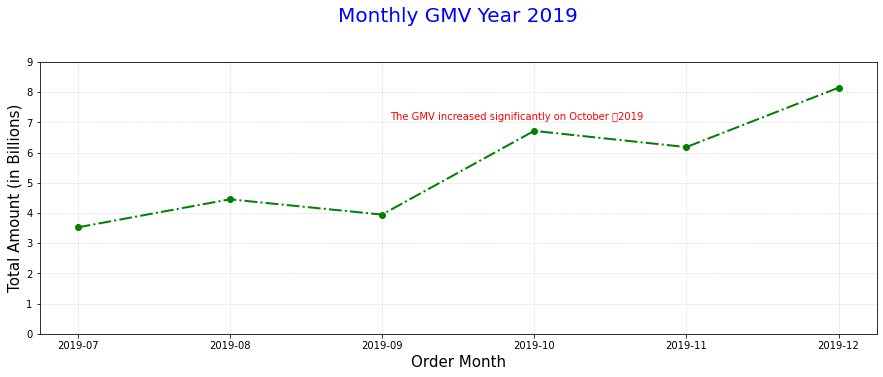

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', 	marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, 	color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45, 0.72, 'The GMV increased significantly on October 	2019', transform=fig.transFigure, color='red')
plt.show()


- Perhatikan bahwa ada beberapa parameter yang diset saat menggunakan plt.text. Dua angka pertama itu adalah koordinat, x dan y. Saat set transform=fig.transFigure, maka koordinatnya berkisar 0 sampai 1 (untuk x dari kanan ke kiri, dan untuk y, dari bawah ke atas).
- Jika parameter transform tidak diisi, maka koordinatnya dalam satuan inch (Dalam contoh ini, dari 0-15 dari kiri ke kanan, dan 0-5 dari bawah ke atas). Seperti halnya title atau label, dimungkinkan juga untuk set warna dan ukuran hurufnya.


## **MENYIMPAN HASIL PLOT MENJADI FILE IMAGE**

- menyimpan sebagai file gambar dengan function **savefig** sebelum **plt.show()**

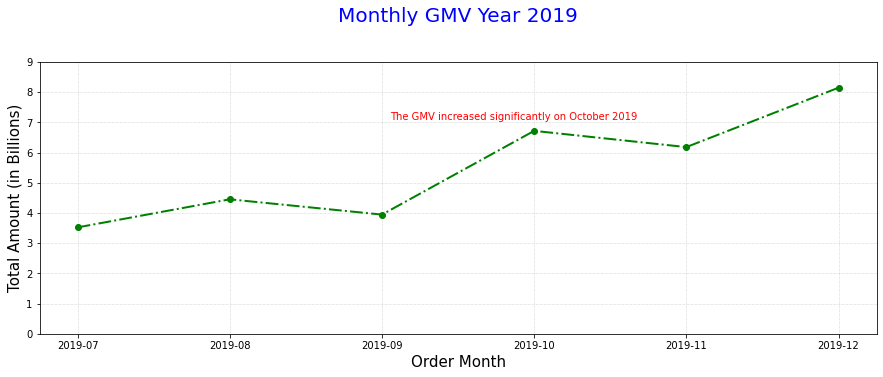

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('monthly_gmv.png')
plt.show()


In [16]:
# jika ingin mendownload dari google colab
from google.colab import files
files.download( "monthly_gmv.png" )  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Kita bisa menyimpannya ke berbagai tipe file, seringnya sih jpg, png, atau kadang pdf juga bisa. Untuk mengetahui format lengkapnya, kita bisa menggunakan code berikut:

In [17]:
plt.gcf().canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 432x288 with 0 Axes>

## **PENGATURAN PARAMETER UNTUK MENYIMPAN GAMBAR**

Ada berbagai parameter yang bisa diatur saat menyimpan gambar, antara lain:
- **dpi**: Resolusi gambar (dots per inch). 
- **quality**: Kualitas gambar (hanya berlaku jika formatnya jpg atau jpeg), bisa diisi nilai 1 (paling buruk) hingga 95 (paling bagus).
- **facecolor**: Memberikan warna bagian depan figure, di luar area plot 
- **edgecolor**: Memberikan warna pinggiran gambar
- **transparent**: Jika nilainya True, maka gambarnya jadi transparan (jika filenya png)

Tapi biasanya, parameter-parameter ini tidak digunakan karena grafik di file gambar bisa jadi berbeda dengan yang muncul saat menjalankan code di python.
Jadi, coba disimpan dengan settingan seperti ini ya:





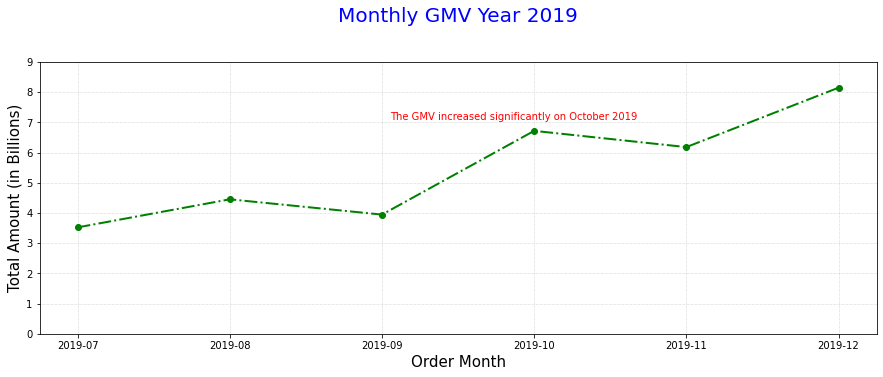

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('monthly_gmv.png', quality=95)
plt.show()


## **STUDI KASUS : DAILY NUMBER OF CUSTOMERS ON DECEMBER**

- Dengan menggunakan dataset yang sama ('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'), buatlah sebuah line chart dengan Matplotlib, yang menunjukkan **jumlah pembeli harian (daily number of customers) selama bulan Desember.**

Beberapa spesifikasi yang harus diperhatikan:
- Ukuran figure adalah 10x5
- Sumbu-x adalah tanggal pembelian, dari tanggal 1 - 31 Desember 2019
- Sumbu-y adalah jumlah unique customers di tiap tanggal
- Title dan axis label harus ada, tulisan dan style-nya silakan disesuaikan sendiri


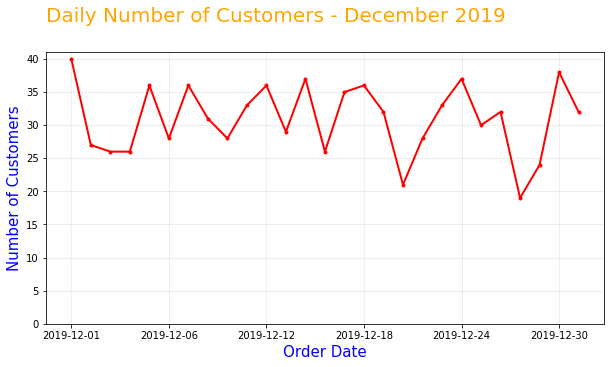

In [19]:
 # Import library yang dibutuhkan
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset retail_raw_reduced.csv
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=30, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()


## **PENUTUP/KESIMPULAN**
Akhirnya, aku telah selesai mempelajari dasar-dasar pembuatan chart menggunakan matplotlib. Catatan untukku sendiri adalah untuk membuat visualisasi, harus mempersiapkan dulu data yang dibutuhkan. Lalu membuat plotnya. Selanjutnya, bisa kustomisasi berbagai komponen pada chart, seperti figure size, title/judul, axis labels, axis ticks, style dari line/points di chart, grid, teks, dan lain sebagainya. Setelah selesai, tentunya bisa menyimpan gambarnya.

Congratulations! Aku berhasil menyelesaikan modul Data Visualization with Python Matplotlib for Beginner - Part 1. Berdasarkan materi-materi yang telah aku pelajari dan praktekkan dalam modul ini, aku sudah mendapatkan pengetahuan (knowledge) dan praktek (skill) yang diantaranya
- mempersiapkan dulu data yang dibutuhkan,
- membuat plot dari data yang telah dipersiapkan,
- mengkustomisasi berbagai komponen di chart yang telah dibuat, seperti figure size, title/judul, axis labels, axis ticks, style dari line/points di chart, grid, teks, dan lain sebagainya,
- menyimpan gambar yang telah dibuat


# **DATA VISUALIZATION WITH PYTHON MATPLOTLIB FOR BEGINNER - PART 2**


## **MENGENAL JENIS JENIS VISUALISASI DAN TUJUANNYA**

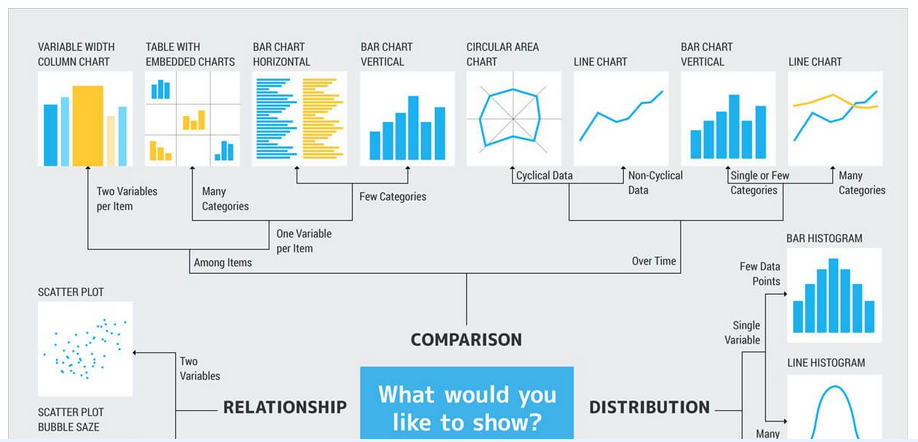

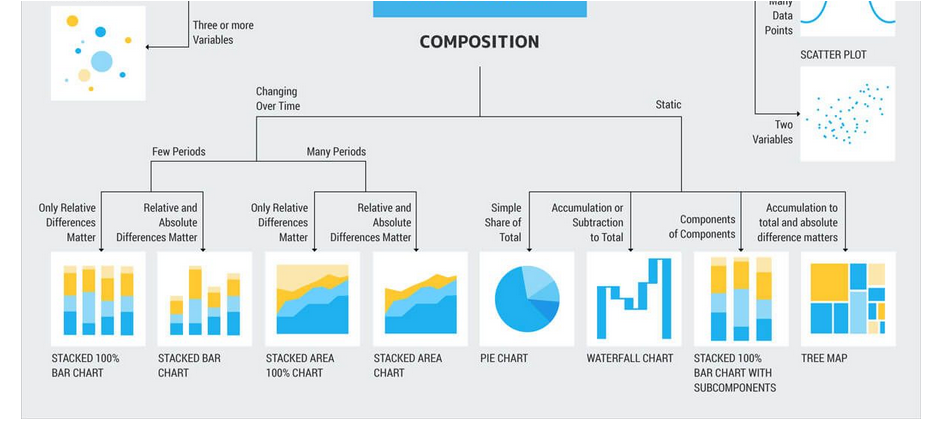

Berikut penjelasannya:
1. **Perbandingan/Komparasi**

Jika ingin membandingkan suatu sekumpulan nilai dengan nilai lainnya, ingin melihat mana yang lebih besar, mana yang lebih tinggi, mana yang naik, dsb. Untuk data yang terkait dengan waktu, visualisasi yang digunakan biasanya berupa line-chart. Sedangkan, jika yang dibandingkan adalah kategorikal, maka lebih cocok menggunakan bar-chart.
2. **Distribusi**

Bila ingin melihat distribusi/persebaran data di suatu variabel. Visualisasi yang lazim digunakan adalah histogram. Bisa melihat apakah datanya banyak terkumpul di nilai-nilai kecil, berat di kanan, atau simetris, ataupun berdistribusi normal. Untuk melihat distribusi di dua variabel, scatterplot juga bisa digunakan.
3. **Komposisi**

Digunakan untuk melihat komposisi dari suatu variabel, jika di-breakdown terhadap suatu dimensi data. Visualisasi yang biasa digunakan adalah stacked bar-chart untuk data kategorikal, atau stacked line-chart untuk data terkait waktu.

4. **Keterhubungan/Relasi**

Ketika ingin melihat keterhubungan antara suatu variabel dengan variabel lain. Misalnya ingin cek, jika variabel A semakin tinggi, apakah variabel B juga semakin tinggi, atau justru lebih rendah, atau tidak ada keterhubungannya. Visualisasi yang biasa digunakan untuk tujuan ini adalah scatter-plot.


## **MEMBUAT MULTI-LINE CHART**
- Dari grafik ini cabang C jadi bisa lihat GMV mereka di bulan Oktober 2019 yang meningkat dratis
- Agar hasilya lebih lengkap lagi, bisa minta tolong gali lebih dalam, **apa yang membuat GMV ini meningkat?** Jadi kita bisa berikan data ini ke Business Development agar mereka bisa menentukan strategi bisnis ke depannya
- breakdown datanya berdasarkan dimensi yah, misalnya berdasarkan **brand atau province**. Nanti akan terlihat bagian mana yang paling berperan dalam kenaikan GMV ini


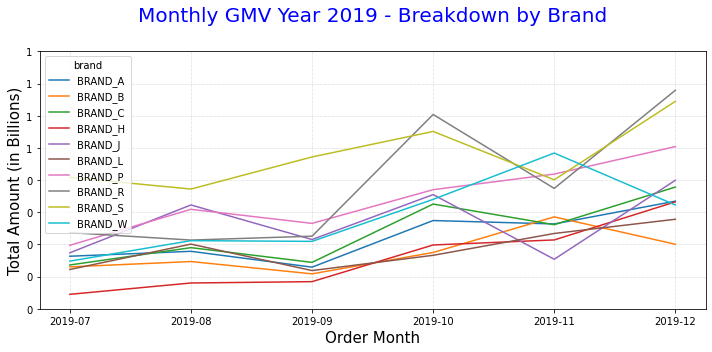

In [20]:
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Buat kolom baru yang bertipe datetime dalam format '%Y-%m'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

# Buat Kolom GMV
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat Multi-Line Chart
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center',pad=30,fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)',fontsize=15)
plt.grid(color='darkgray', linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()


## **KUSTOMISASI LEGEND**
- Dari grafik multi line chart diatas, terdapat komponen baru yaitu legend.
- Berhubung brand-nya ada banyak, dan defaultnya di tengah makanya jadi menutupi grafiknya. Solusinya adalah kita pakai function khusus ya.
Atur komponen legend menggunakan function **plt.legend()** 

Beberapa parameter yang bisa ditambahkan untuk legend:
- **loc**: untuk menentukan posisi legend, berikut beberapa lokasi legend yang bisa didefinisikan: 
  - 'upper left', 'upper right', 'lower left', 'lower right':legend diletakkan di pojok dari axes (atas kiri, atas kanan, bawah kiri, atas kiri)
  - 'upper center', 'lower center', 'center left', 'center right': legend diletakkan di tepi axes (atas tengah, bawah tengah, tengah kiri, tengah kanan)
  - 'center': legend diletakkan di tengah-tengah axes
  - 'best': matplotlib akan memilih satu dari sekian kemungkinan lokasi legend di atas yang paling tidak overlap dengan isi grafik
- **bbox_to_anchor**: biasanya digunakan untuk adjust lokasi dari legend. Bisa berisi 2 angka yang menunjukkan koordinat x dan y (misal (1.6,0.5) berarti geser 1.6 ke kanan dan 0.5 ke atas). Bisa juga berisi 4 angka, angka ketiga dan keempat menyatakan width (lebar) dan height (tinggi) dari legend.
- **shadow**: jika diisi True, maka kotak legend akan memiliki bayangan.
- **ncol**: jumlah kolom dari isi legend, defaultnya adalah 1
- **fontsize**: ukuran huruf pada legend
- **title**: memberikan judul pada legend
- **title_fontsize**: ukuran huruf pada judul legend



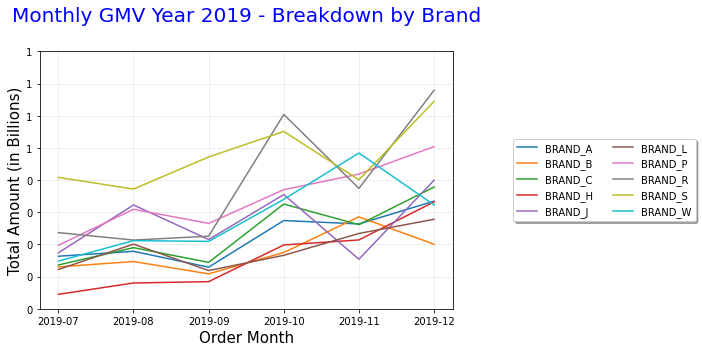

In [21]:
import matplotlib.pyplot as plt
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()


## **KUSTOMISASI COLORMAP**

- Kalau sudah di breakdown by brand seperti ini terlihat ya trend sepanjang Oktober-Desember 2019 ini mirip semua. Jadi kemungkinan tidak ada faktor dari brand yang membuat GMV kita naik, coba perlihatkan data breakdown by province


<Figure size 432x288 with 0 Axes>

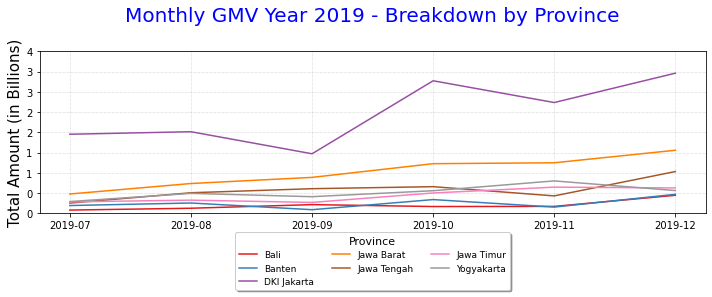

In [22]:
import matplotlib.pyplot as plt
plt.clf()
dataset.groupby(['order_month','province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20,color='blue')
plt.xlabel('Order Month',fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize=15)
plt.grid(color='darkgray', linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
labels, locations=plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3, title='Province',fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()


- Selain itu, perhatikan juga bahwa pada grafik tersebut, list warnanya berbeda, tidak default seperti pada brand. Itu karena di function plot() ditambahkan parameter **cmap** (yakni, color map) yang mendefinisikan sekelompok warna yang akan diberikan untuk tiap line. Di sini yang digunakan adalah **‘Set1’**, yakni satu set warna yang biasa digunakan untuk warna yang diskrit. Untuk mengetahui jenis-jenis color map, bisa dilihat di halaman web berikut: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html.
- Dari grafik ini, terlihat ada beberapa provinsi yang mendominasi kenaikan GMV, seperti DKI Jakarta dan Jawa Barat. Tapi karena provinsinya banyak, yang bawah-bawah jadi kurang jelasnya. Bercampur semua begitu garisnya.


## **MEMBUAT LINE CHART GMV BREAKDOWN BY TOP PROVINCE**

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


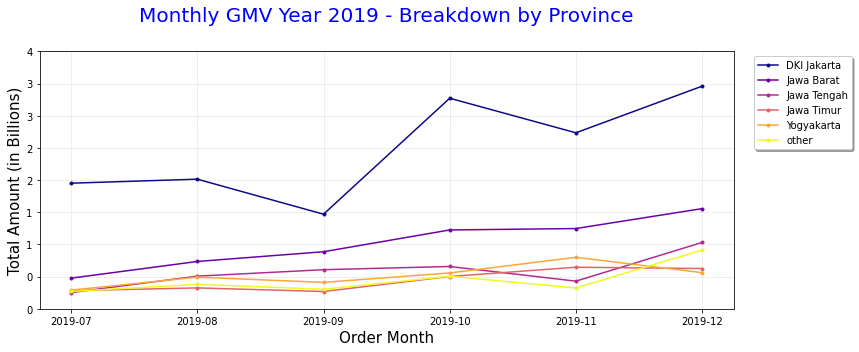

In [23]:
# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
.sum()
.reset_index()
.sort_values(by='gmv',ascending=False)
.head(5))
print(top_provinces)

# Buat satu kolom lagi di dataset dengan nama province_top
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

# Plot multi-line chartnya
import matplotlib.pyplot as plt
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()


## **MEMBUAT ANOTASI**
- Anotasi itu mirip seperti teks, hanya saja ada suatu titik tertentu yang kita tunjuk untuk diberikan informasi tambahan. Selain itu, kita bisa menambahkan panah melalui anotasi
- Untuk membuat annotate, gunakan function **plt.annotate**. Parameter pertama adalah isi teksnya, dan parameter kedua adalah koordinat dari point yang dianotasi.

Selain itu ada beberapa parameter untuk anotasi yang bisa ditambahkan:
- **xytext**: Koordinat dari teks. Jika tidak diisi,maka teks akan diletakkan di koordinat point yang dianotasi (parameter kedua)
- **arrowprops**:Konfigurasi dari panah yang ditambahkan di anotasi, berupa dictionary. Beberapa hal yang bisa diset: 
  - **arrowstyle**: menentukan bentuk dari panah penunjuk. Isinya bisa berupa bentuk seperti '->', '-|>', '<->', '-[', dsb. Bisa juga berupa tulisan seperti 'fancy', 'simple', 'wedge', etc.
  - **connectionstyle**: menentukan bentuk dari garis panahnya. Ada beberapa nilai yang bisa digunakan, misalnya 'arc' dan 'arc3' yang berupa garis lurus, 'angle' untuk garis berbelok siku, 'angle3' untuk garis berbelok lengkung, atau 'bar' untuk berbelok siku dua kali.
  - **color**: menentukan warna dari panah



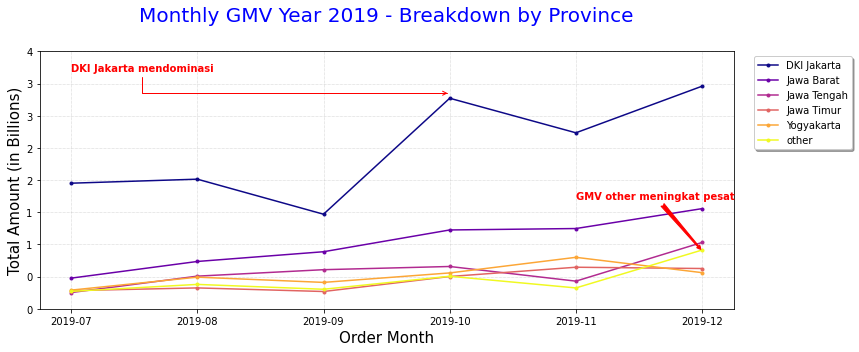

In [24]:
import matplotlib.pyplot as plt
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)

# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000), 
             xytext=(4, 1700000000), weight='bold', color='red',
             arrowprops=dict(arrowstyle='fancy',
                             connectionstyle="arc3",
                             color='red'))

# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000), 
             xytext=(0, 3700000000), weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="angle",
                             color='red'))
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()


## **MEMBUAT SUBSET DATA**
- provinsi ‘other’ ini, kita analisis lagi di lain waktu saja dan fokuskan untuk analisis behavior transaksi di **DKI Jakarta** pada bulan **Oktober-Desember 2019** ini, karena trend-nya mirip dengan overall GMV
- , berhubung kita mau fokus ke provinsi DKI Jakarta dan bulan Oktober-Desember 2019, kita filter saja datanya dan disimpan ke dataframe baru
- Nama data frame yaitu **dataset_dki_q4**


In [25]:
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
print(dataset_dki_q4.head())


   order_id  order_date  customer_id  ... order_month      gmv province_top
0   1703458  2019-10-17        14004  ...     2019-10  7400000  DKI Jakarta
1   1706815  2019-10-24        17220  ...     2019-10  1208000  DKI Jakarta
2   1710718  2019-11-03        16518  ...     2019-11  8360000  DKI Jakarta
4   1702573  2019-10-16        15696  ...     2019-10  8950000  DKI Jakarta
6   1711399  2019-11-04        16791  ...     2019-11  1465000  DKI Jakarta

[5 rows x 12 columns]


## **MEMBUAT PIE CHART**
- Sebelum membuat pie chart terlebih dahulu buat dulu dataframe agregat

Misalnya  **gmv_per_city_dki_q4**,  masukkan datanya ke function **plt.pie()**.

Beberapa parameter yang bisa dimodifikasi:
- **labels**: array yang berisikan label/tulisan yang ditunjukkan untuk masing-masing bagian pie.
- **colors**: array yang berisikan warna untuk masing-masing bagian pie.
- **autopct**: format untuk nilai persentasi yang ditampilkan, bisa berupa string atau function.
- **shadow**: jika diisi True, maka ada bayangan untuk pie chart-nya. Defaultnya adalah False.
•	**radius**: jari-jari dari pie-chart



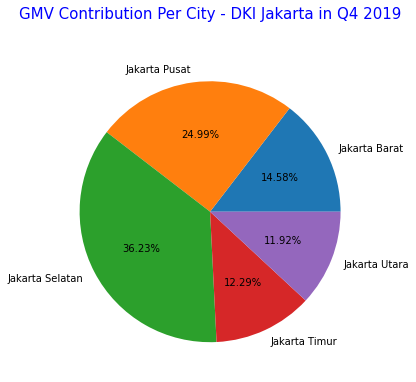

In [26]:
import matplotlib.pyplot as plt
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'],autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019',loc='center',pad=30,fontsize=15, color='blue')
plt.show()


## **MEMBUAT BAR CHART**
- Alternatif lain untuk membandingkan GMV tiap kota adalah dengan **barchart**. Saya lebih menyukai visualisasi ini karena lebih mudah terlihat perbandingan antar kota


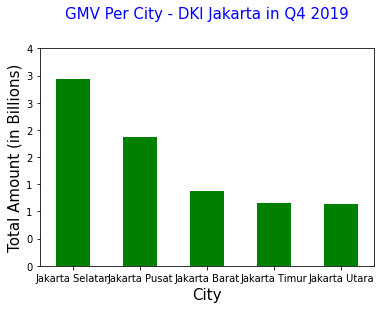

In [27]:
import matplotlib.pyplot as plt
plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019', loc='center',pad=30,fontsize=15,color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)',fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()


- Perhatikan di sini juga ditambahkan parameter rotation di plt.xtick() untuk memutar label di sumbu-x.
- Sebagai catatan, jika ingin barchart-nya horizontal, maka bisa mengganti parameternya menjadi **kind='barh'**, dengan tentu saja tidak lupa juga harus menyesuaikan sumbu x dan y nya.


## **MEMBUAT MULTI BAR CHART**
- Berdasarkan bar diatas Jakarta Selatan dan Jakarta Pusat lumayan mendominasi. tampilkan multi bar untuk melihat GMV setiap bulan


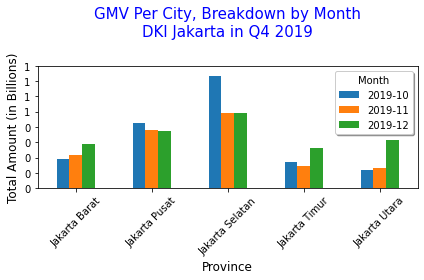

In [28]:
import matplotlib.pyplot as plt
dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize=12)
plt.ylabel('Total Amount (in Billions)',fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **MEMBUAT STACKED CHART**


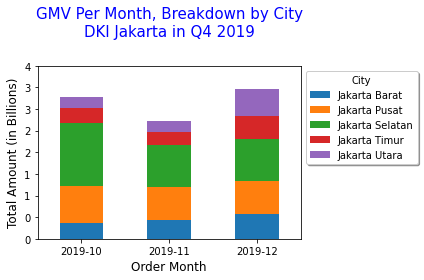

In [29]:
import matplotlib.pyplot as plt
dataset_dki_q4.groupby(['order_month','city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Total Amount (in Billions)',fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1, title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


- Dari kedua chart tersebut, kita sama-sama bisa melihat pola bahwa kebanyakan **GMV turun** dari bulan **Oktober ke November**, tetapi lalu **naik pesat di bulan Desember**. Untuk di Jakarta Barat, GMV November justru naik dari Oktober. Sedangkan di Jakarta Selatan, GMV Desember justru lebih kecil daripada GMV Oktober
- Hmm, padahal Jakarta Selatan adalah penyumbang GMV paling besar ya. Berarti kita harus menyarankan tim bisnis untuk genjot lagi penjualan di sana, agar trend-nya naik kembali, seperti kota-kota lainnya

## **MEMBUAT AGREGAT DATA CUSTOMER**
- Kalau dilihat, ini di Jakarta Barat potensinya lagi baik ya. Tiap bulan growth-nya positif
- Bagaimana dengan customer kita di DKI Jakarta? Apakah ada pola-pola menarik, terutama di Q4 2019?
- Untuk mengetahuinya kita lihat dulu summary tiap customer dengan membuat dataframe terlebih dahulu yaitu **data_per_customer_dki_q4**

In [30]:
data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                           .agg({'order_id':'nunique', 
                                                 'quantity': 'sum', 
                                                 'gmv':'sum'})
                                           .reset_index()
                                           .rename(columns={'order_id':'orders'}))
print(data_per_customer.sort_values(by='orders',ascending=False))

                                        


     customer_id  orders  quantity        gmv
0          12748      29       557  175286000
662        17841      26       270  144788000
207        14606      13        25   20714000
25         13089       8       166   93554000
462        16549       8        29   22714000
..           ...     ...       ...        ...
294        15154       1         4    2689000
291        15148       1        12    5400000
289        15121       1         8    2424000
288        15117       1         1    3494000
384        15975       1        42   25410000

[711 rows x 4 columns]


## MEMBUAT HISTOGRAM - PART 1
- Dengan menggunkana dataframe baru kita bisa melihat persebaran datanya sekaligus masing masing variabel
- gunakan function plt.hist dan memasukkan variabel yang ingin dicek. Parameter yang bisa ditambahkan yaitu 
  - **bins**: jumlah bin (kelompok nilai) yang diinginkan
  - **range**: nilai minimum dan maksimum yang ditampilkan
  - **orientation**: ‘horizontal’ atau ‘vertikal’
  - **color**: warna bar di histogram



<Figure size 432x288 with 0 Axes>

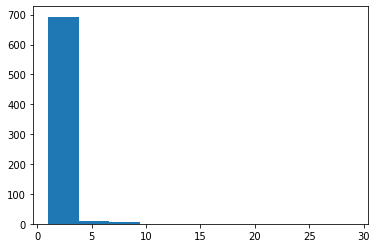

In [31]:
import matplotlib.pyplot as plt
plt.clf()
# histogram pertama
plt.figure()
plt.hist(data_per_customer['orders'])
plt.show()

Terlihat bahwa datanya terlalu berat ke kiri, hampir semua customer hanya bertransaksi kurang dari 10, maka dari itu perlu set range-nya, misalnya hanya dari 1 sampai 5.

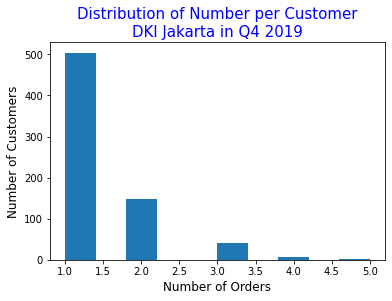

In [32]:
# histogram kedua
plt.figure()
plt.hist(data_per_customer['orders'], range=(1,5))
plt.title('Distribution of Number per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

## **MEMBUAT HISTOGRAM - PART 2**
- buat histogram untuk variabel quantity

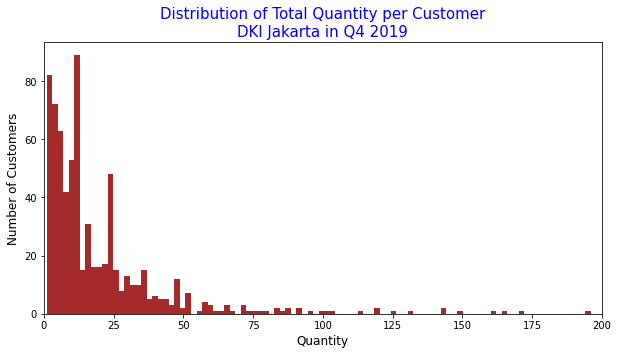

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1,200), color='brown')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlim(xmin=0,xmax=200)
plt.show()


## **MEMBUAT HISTOGRAM - PART 3**
- Kalau untuk GMV harus dinormalisasikan tick label di sumbu x karena angka yang menunjukkan GMV bisa jadi terlalu panjang

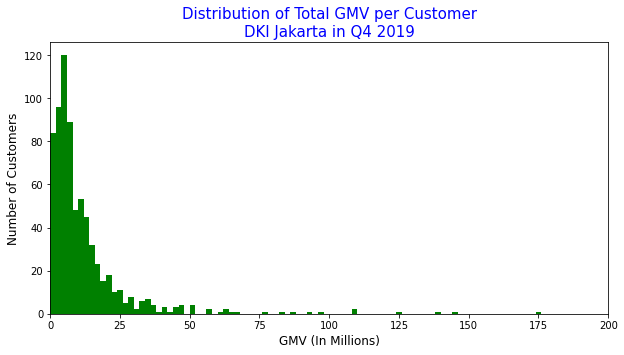

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['gmv'], bins=100, range=(1,200000000), color='green')
plt.title('Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('GMV (In Millions)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlim(xmin=0,xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()


## **MEMBUAT SCATTERPLOT**
- Uuntuk melihat apakah variabel saling berkorelasi, gunakan scatterplot
- untuk menggunakan scatterplot, perlu menggunakan function **plt.scatter**

<Figure size 432x288 with 0 Axes>

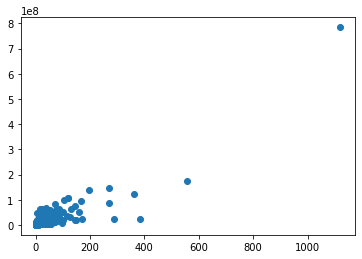

In [35]:
import matplotlib.pyplot as plt
plt.clf()
# scatterplot pertama
plt.figure()
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'])
plt.show()

Terlihat bahwa memang semakin besar quantity-nya, GMV cenderung semakin tinggi. Tapi masalahnya datanya banyak terkumpul di nilai-nilai kecil, sehingga tidak begitu terlihat detailnya di area situ.

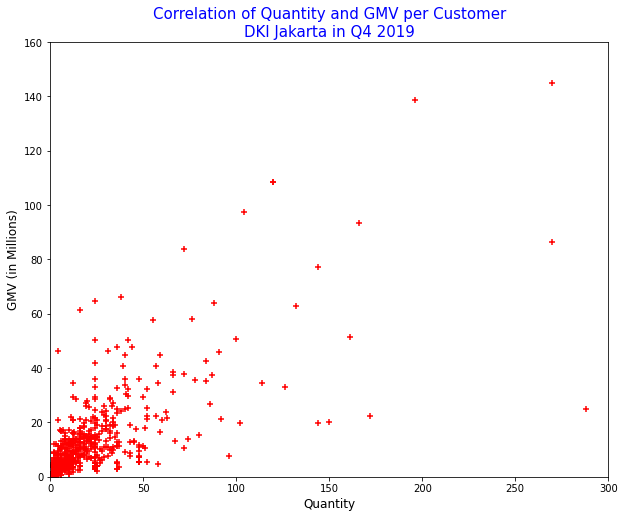

In [36]:
# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('GMV (in Millions)', fontsize=12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()


Di sini semakin jelas bahwa **quantity dan GMV itu berkorelasi positif**. Jadi jika suatu customer telah membeli dengan banyak quantity, maka kemungkinan GMV dari dia juga semakin besar.

## **PENDAHULUAN**
Dari pembelajaran diatas kitta mempelajari bagaimana membuat berbagai jenis visualisasi dengan matplotlib, diantaranya:
1.	membuat multi line-chart yang dapat digunakan untuk melihat komparasi dari GMV dari berbagai provinsi, dari bulan ke bulan.
2.	menghasilkan pie chart atau multi bar-chart untuk melihat komposisi GMV per kota.
3.	untuk melihat distribusi GMV atau quantity, kita bisa gunakan histogram.
4.	membuat scatterplot yang bisa memperlihatkan relasi antara quantity dan GMV.


# **MINI PROJECT**

## **CASE 1: MENENTUKAN BRAND TOP 5**
Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.
 
#### **Case 1:**
Buat variabel baru (dataset_top5brand_dec) yang berisi data penjualan bulan Desember 2019, hanya untuk top 5 brand dengan quantity terjual terbanyak selama bulan Desember 2019. Sebutkan top 5 brands tersebut! Untuk visualisasi-visualisasi selanjutnya, hanya gunakan data frame ini.



In [40]:
#mengambil informasi top 5 brands berdasarkan quantity
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))

#membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya top 5 brands
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]
# print top brands
print(top_brands)


     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


## **CASE 2: MULTI LINE CHART DAILY QUANTITY UNTUK BRAND TOP 5**

Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.

### **Case 2:**
Buat visualisasi multi-line chart untuk daily quantity terjualnya, breakdown per brand. Maka, akan terlihat 1 tanggal di mana ada salah satu brand yang mengalami lonjakan (quantity lebih tinggi dari tanggal-tanggal lain). Beri anotasi untuk titik lonjakan tersebut.


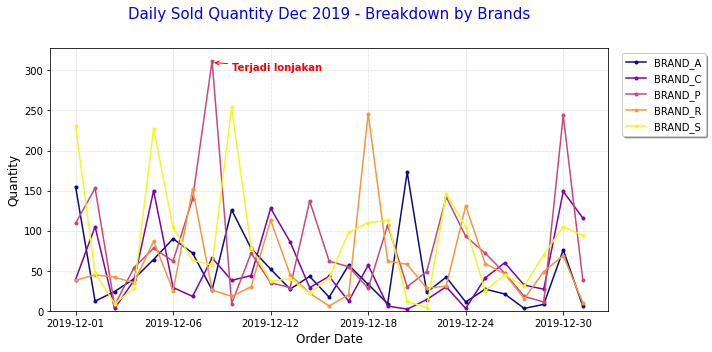

In [41]:
import pandas as pd
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Daily Sold Quantity Dec 2019 - Breakdown by Brands',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()


## **CASE 3: KUANTIITAS PENJUALAN BRAND TOP 5 SSELAMA DESEMBER 2019**

Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.

### **Case 3:**
Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019. Gunakan barchart untuk visualisasinya, urutkan dengan yang kiri adalah brand dengan product lebih banyak.


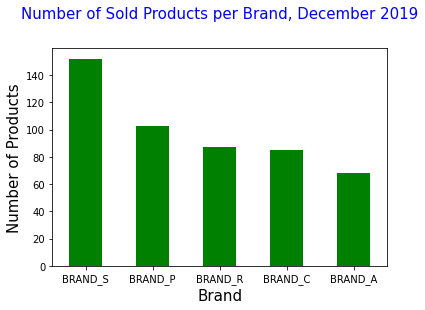

In [42]:
import matplotlib.pyplot as plt
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()


## **CASE 4: PENJUALAN PRODUK DIATAS 100 DAN DIBAWAH 100 SELAMA DESEMBER 2019**

Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.
### **Case 4:**
Gunakan stacked chart, untuk breakdown barchart yang di Case 3, antara product yang terjual >= 100 dan < 100 di bulan Desember 2019. Apakah ada pola yang menarik?


*Case 3: Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019. Gunakan barchart untuk visualisasinya, urutkan dengan yang kiri adalah brand dengan product lebih banyak.*


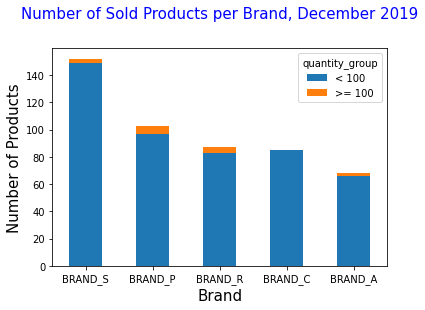

In [43]:
import matplotlib.pyplot as plt
#membuat dataframe baru, untuk agregat jumlah quantity terjual per product
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

#beri kolom baru untuk menandai product yang terjual >= 100 dan <100
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

#membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

#plot stacked barchart
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()


## **CASE 5: MURAH ATAU MAHALKAH HARGA PRODUK BRAND TOP 5**

Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.

### **Case 5:**
Gunakan histogram untuk melihat distribusi harga product-product yang ada di top 5 brand tersebut (untuk tiap product_id, ambil median harganya). Bagaimana persebaran harga product nya? Cenderung banyak yang murah atau yang mahal?


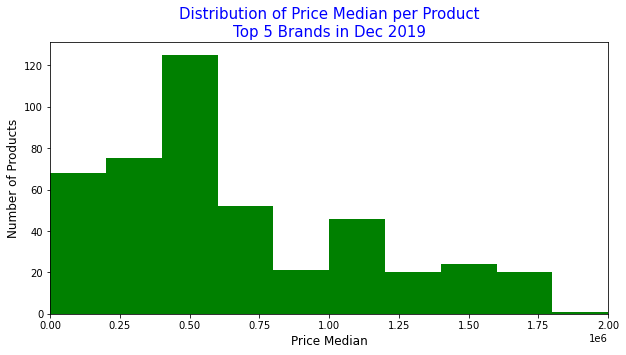

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='green')
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Number of Products',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.show()


## **CASE 6A: KORELASI QUANTITY VS GMV**
Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.

### **Case 6a:**
Untuk setiap product_id, cek scatterplot antara  quantity dan GMV, apakah ada korelasi? Bagaimana dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?


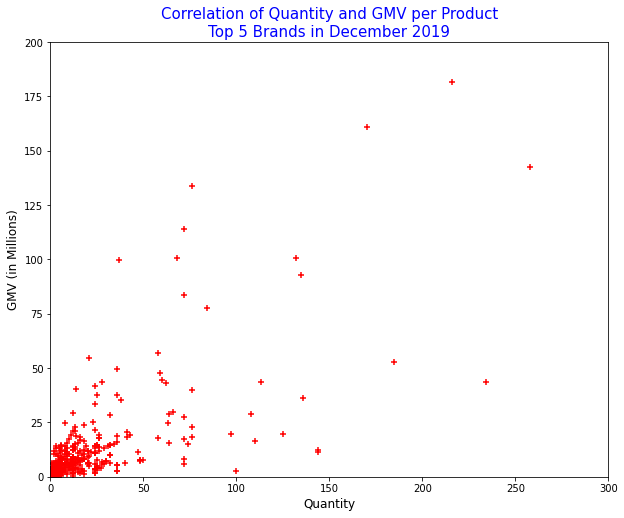

In [45]:
import matplotlib.pyplot as plt
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()


## **CASE 6B: KORELASI MEDIAN HARGA VS QUANTITY**

Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.

### **Case 6b:**
Untuk setiap product_id, cek scatterplot antara  quantity dan GMV sudah kamu lakukan pada Case 6a? Untuk Case 6b ini bagaimanakah dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?


<Figure size 432x288 with 0 Axes>

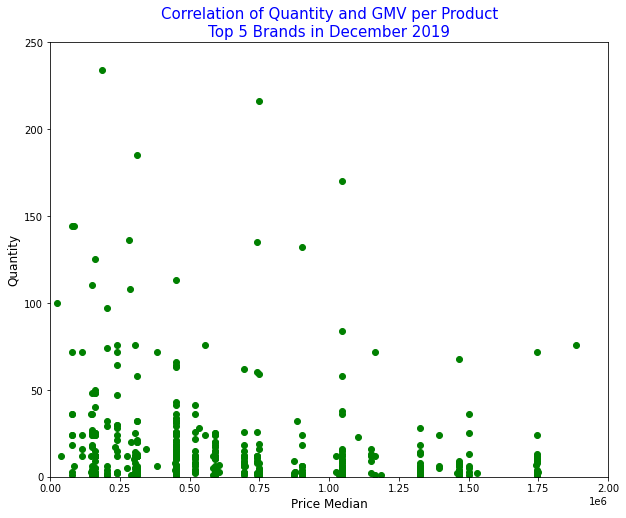

In [46]:
import matplotlib.pyplot as plt
plt.clf()
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='green')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()


## **Penutup/Kesimpulan**
Berdasarkan materi-materi yang telah aku pelajari dan praktikkan dalam modul ini, berikut summary materi yang telah kudapatkan pengetahuan (knowledge) dan praktek (skill), diantaranya :
- membuat multi line-chart 
- membuat pie chart atau multi bar-chart 
- membuat grafik distribusi suatu data dengan menggunakan histogram.
- membuat scatterplot yang dikustomisasi secara langsung untuk menampilkan hasil visualisasi yang menarik dan memberikan insight kepada pembaca. Serta,
- mengerjakan mini project untuk memvisualisasikan data produk retail berdasarkan pengetahuan (knowledge) dan praktek (skill) yangtelah diperoleh pada bab-bab sebelumnya.
